<a href="https://colab.research.google.com/github/ilEnzio/StarKells_Twitch_data/blob/master/ERLE_GRANGERII_UNIT02_Exploration_Cleaning_FeatureENGcolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### So far I have sourced data directly from twitch.com:

**starkells_twitch_copy.csv**

and from the streamer (via there streamlabs extension): 

**starkells_twitch_donation.csv**

It is located on a temp git hub.  

This data are the **basic "analytics"** that twitch makes available to every **"affilate" or "partnered" streamer**.  It represents the entire stream history from the very first stream to the present -**approximately 3 years **-.  During this time "StarKells" has streamed part-time and grown her following and revenue from zero to the present numbers. 

**My research question** will probably be centered around determining which factors are the most important for **revenue or follower growth.** 

Revenue is self explanatory, but follower growth is important because currently starkells is an affliate but **would like to become a partnered streamer** - better contract/more perks and status from twitch.  In order to become a partner she **must raise her viewing numbers irrespective of revenue**.   

In [ ]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

## Import some basic libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from datetime import datetime

import category_encoders as ce
from category_encoders import OrdinalEncoder # encode cats into ordered numbers
from category_encoders import OneHotEncoder # splits cat variable 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dates = ["Date"]
twitch_analy_df = pd.read_csv("https://raw.githubusercontent.com/ilEnzio/StarKells_Twitch_data/master/starkells_twitch_copy.csv")
donations_df = pd.read_csv("https://raw.githubusercontent.com/ilEnzio/StarKells_Twitch_data/master/starkells_twitch_donation.csv",
                           parse_dates=dates)

In [ ]:
# New code for Pandas Profiling version 2.4
from pandas_profiling import ProfileReport
profile = ProfileReport(twitch_analy_df, minimal=True).to_notebook_iframe()

profile

In [ ]:
print(twitch_analy_df.shape)
print(donations_df.shape)

(1171, 32)
(176, 2)


In [ ]:
twitch_orginal = twitch_analy_df.copy()
donation_orginal = donations_df.copy()

In [ ]:
twitch_analy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1171 non-null   object 
 1   Ad Breaks (Minutes)          1171 non-null   int64  
 2   Ad Time (Seconds) Per Hour   1171 non-null   int64  
 3   Average Viewers              1171 non-null   float64
 4   Chat Messages                1171 non-null   int64  
 5   Chatters                     1171 non-null   int64  
 6   Clip Views                   1171 non-null   int64  
 7   Clips Created                1171 non-null   int64  
 8   Follows                      1171 non-null   int64  
 9   Hosts and Raids Viewers (%)  1171 non-null   float64
 10  Live Views                   1171 non-null   int64  
 11  Max Viewers                  1171 non-null   int64  
 12  Minutes Watched              1171 non-null   int64  
 13  Minutes Streamed  

In [ ]:
twitch_analy_df["Sub Revenue"].value_counts()

0.000    580
2.320     81
2.270     63
4.700     27
2.380     25
        ... 
2.830      1
2.610      1
6.215      1
9.255      1
4.780      1
Name: Sub Revenue, Length: 162, dtype: int64

In [ ]:
twitch_analy_df.columns

Index(['Date', 'Ad Breaks (Minutes)', 'Ad Time (Seconds) Per Hour',
       'Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'Sub Revenue', 'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue',
       'Ad Revenue', 'Game Sales Revenue', 'Extensions Revenue',
       'Bounties Revenue', 'Prime Subs', 'Total Paid Subs', 'Tier 1 subs',
       'Tier 2 subs', 'Tier 3 subs', 'Total Gifted Subs', 'Gifted Tier 1 subs',
       'Gifted Tier 2 subs', 'Gifted Tier 3 subs'],
      dtype='object')

In [ ]:
# how many Tier 2 subs and what are they worth. 
twitch_analy_df['Tier 2 subs'].value_counts()

0    1081
1      79
2      11
Name: Tier 2 subs, dtype: int64

In [ ]:
cond_t2 = twitch_analy_df['Tier 2 subs'] > 0
cond_t2

0       False
1       False
2       False
3       False
4       False
        ...  
1166    False
1167    False
1168    False
1169    False
1170    False
Name: Tier 2 subs, Length: 1171, dtype: bool

In [ ]:
t2_subs_only_df = twitch_analy_df[cond_t2]
t2_subs_only_df['Tier 2 subs'].value_counts()

1    79
2    11
Name: Tier 2 subs, dtype: int64

In [ ]:
t2_subs_only_df.tail(10)

,Date,Ad Breaks (Minutes),Ad Time (Seconds) Per Hour,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Game Sales Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs
1041,Tue Apr 07 2020,0,0,0.00,9,1,2,0,0,0.00,0,0,0,0,0,6.91,0.000,0.000,0.0,0.0000,0,0.0,0,0,2,1,1,0,0,0,0,0
1042,Wed Apr 08 2020,0,0,24.80,952,42,1,1,3,0.60,222,35,4688,189,160,9.53,0.000,0.000,0.0,0.1225,0,0.0,0,0,2,0,2,0,0,0,0,0
1071,Thu May 07 2020,0,0,24.58,847,48,2,0,2,2.90,141,56,3834,157,114,6.91,0.000,0.000,0.0,0.0735,0,0.0,0,0,2,1,1,0,0,0,0,0
1072,Fri May 08 2020,0,0,42.43,222,25,0,0,3,22.11,80,62,3225,76,67,11.85,2.495,4.650,1.0,0.0000,0,0.0,0,1,3,1,2,0,2,2,0,0
1102,Sun Jun 07 2020,0,0,0.00,13,1,0,0,0,0.00,0,0,0,0,0,6.91,0.000,0.000,0.0,0.0000,0,0.0,0,0,2,1,1,0,0,0,0,0
1103,Mon Jun 08 2020,0,0,0.00,0,0,0,0,0,0.00,1,0,0,0,1,11.85,0.000,0.000,0.0,0.0000,0,0.0,0,0,3,1,2,0,0,0,0,0
1132,Tue Jul 07 2020,0,0,0.00,16,1,0,0,0,0.00,0,0,0,0,0,6.91,0.000,0.000,0.0,0.0000,0,0.0,0,0,2,1,1,0,0,0,0,0
1133,Wed Jul 08 2020,0,0,23.77,946,41,0,3,0,5.90,140,44,3780,168,120,11.85,0.000,0.000,0.0,0.0700,0,0.0,0,0,3,1,2,0,0,0,0,0
1163,Fri Aug 07 2020,0,0,23.81,1545,36,0,0,2,11.34,160,34,5310,222,108,9.23,0.000,23.250,1.0,0.0455,0,0.0,0,0,3,2,1,0,10,10,0,0
1164,Sat Aug 08 2020,0,0,25.52,73,18,0,0,0,13.57,28,31,1710,67,25,11.85,0.000,11.985,1.0,0.0000,0,0.0,0,0,3,1,2,0,5,5,0,0


### After looking at this data is became clear that the **payout fee** was cutting a significant amount of profit.  How much??  This speaks to how important is to become a partner.  **Partners do not pay the payout fee.**  They

In [ ]:
# number of days she's had 45 or more viewers
cond_45_viewers = twitch_analy_df['Max Viewers'] >=45
max_viewers45_df = twitch_analy_df[cond_45_viewers]
max_viewers45_df.shape

(337, 32)

In [ ]:
max_viewers45_df['Sub Revenue'].describe()

count    337.000000
mean       2.851884
std        3.086241
min        0.000000
25%        0.000000
50%        2.270000
75%        4.615000
max       16.795000
Name: Sub Revenue, dtype: float64

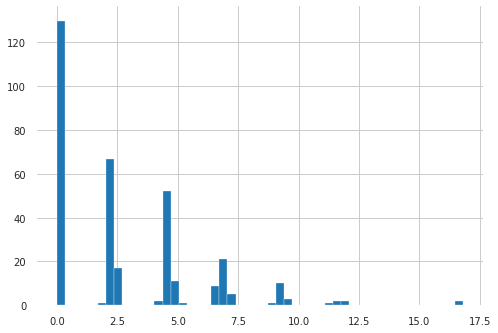

In [ ]:
max_viewers45_df['Sub Revenue'].hist(bins=50);

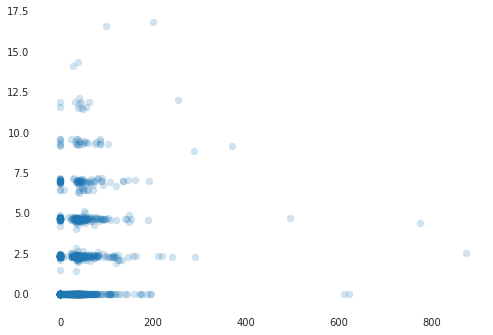

In [ ]:
# I want a scatter with Max Viewers vs Sub Revenue
plt.scatter(twitch_analy_df["Max Viewers"],
            twitch_analy_df["Sub Revenue"], alpha=.2)
plt.show()

In [ ]:
twitch_analy_df['Bits Revenue'].value_counts()

0.00     627
1.00      27
0.10      17
0.05      10
1.10       9
        ... 
35.10      1
1.27       1
1.97       1
6.87       1
27.96      1
Name: Bits Revenue, Length: 351, dtype: int64

In [ ]:
# Let's stop taking pot shots and do a correlation matrix...
# first pick some features of interest
twitch_analy_df.columns

Index(['Date', 'Ad Breaks (Minutes)', 'Ad Time (Seconds) Per Hour',
       'Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'Sub Revenue', 'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue',
       'Ad Revenue', 'Game Sales Revenue', 'Extensions Revenue',
       'Bounties Revenue', 'Prime Subs', 'Total Paid Subs', 'Tier 1 subs',
       'Tier 2 subs', 'Tier 3 subs', 'Total Gifted Subs', 'Gifted Tier 1 subs',
       'Gifted Tier 2 subs', 'Gifted Tier 3 subs'],
      dtype='object')

In [ ]:
twitch_analy_df.shape

(1171, 32)

## Total Revenue feature - Put in wrangle function

In [ ]:
# Create a new Total_Revenue column 
twitch_analy_df["Total_Sub_Revenue"] = twitch_analy_df["Sub Revenue"] + twitch_analy_df['Prime Revenue'] + twitch_analy_df['Gifted Subs Revenue'] + twitch_analy_df['Bits Revenue'] + twitch_analy_df['Ad Revenue'] + twitch_analy_df['Extensions Revenue']

In [ ]:
twitch_analy_df["Date"].head()

0    Thu Jun 01 2017
1    Fri Jun 02 2017
2    Sat Jun 03 2017
3    Sun Jun 04 2017
4    Mon Jun 05 2017
Name: Date, dtype: object

In [ ]:
# Create a new column Day of Weeek
# twitch_analy_df["day_of_week"]
x = twitch_analy_df.iloc[0,0]
x

'Thu Jun 01 2017'

In [ ]:
x_date = x.split()
x_date

['Thu', 'Jun', '01', '2017']

In [ ]:
day = x_date[0]
day

'Thu'

In [ ]:
month = x_date[1]
month

'Jun'

In [ ]:
year = x_date[3]
year

'2017'

In [ ]:
x_date

['Thu', 'Jun', '01', '2017']

In [ ]:
x = month
x

'Jun'

In [ ]:

if x == "Jan":
  x = "01"
if x == "Feb":
  x = "02"
if x == "Mar":
  x = "03"
if x == "Apr":
  x = "04"
if x == "May":
  x = "05"
if x == "Jun":
  x = "06"
if x == "Jul":
  x = "07"
if x == "Aug":
  x = "08"
if x == "Sep":
  x = "09"
if x == "Oct":
  x = "10"
if x == "Nov":
  x = "11"
if x == "Dec":
  x = "12"
x_date[1] = x
x_date[1]

'06'

In [ ]:
final_date = x_date[3]+"/"+x_date[1] + "/" + x_date[2]
final_date

'2017/06/01'

In [ ]:
final_date = datetime.strptime(final_date, "%Y/%m/%d")
print(final_date)

2017-06-01 00:00:00


## Convert the date - add to wrangle function 

In [ ]:
 def convert_twitch_date(twitch_df):
   # create list of dates to change
  date_list = twitch_df.iloc[:,0]

  # create empty new list for the converted dates
  new_date = []

  for date in date_list:
    x_date = date.split()
    day, month, year  = x_date[2],x_date[1], x_date[3]
    x = month
    if x == "Jan":
      x = "01"
    if x == "Feb":
      x = "02"
    if x == "Mar":
      x = "03"
    if x == "Apr":
      x = "04"
    if x == "May":
      x = "05"
    if x == "Jun":
      x = "06"
    if x == "Jul":
      x = "07"
    if x == "Aug":
      x = "08"
    if x == "Sep":
      x = "09"
    if x == "Oct":
      x = "10"
    if x == "Nov":
      x = "11"
    if x == "Dec":
      x = "12"
    month = x

    final_date = year + "/" + month + "/" + day
    # convert the string to a datetime
    final_date = datetime.strptime(final_date, "%Y/%m/%d")

    new_date.append(final_date)
  
  twitch_df["new_date"] = new_date

  return twitch_df

In [ ]:
test_wrangle_df = convert_twitch_date(twitch_analy_df)
test_wrangle_df.head(2)

,Date,Ad Breaks (Minutes),Ad Time (Seconds) Per Hour,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Game Sales Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,Total_Sub_Revenue,new_date
0,Thu Jun 01 2017,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,2017-06-01
1,Fri Jun 02 2017,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,2017-06-02


In [ ]:
test_wrangle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1171 non-null   object        
 1   Ad Breaks (Minutes)          1171 non-null   int64         
 2   Ad Time (Seconds) Per Hour   1171 non-null   int64         
 3   Average Viewers              1171 non-null   float64       
 4   Chat Messages                1171 non-null   int64         
 5   Chatters                     1171 non-null   int64         
 6   Clip Views                   1171 non-null   int64         
 7   Clips Created                1171 non-null   int64         
 8   Follows                      1171 non-null   int64         
 9   Hosts and Raids Viewers (%)  1171 non-null   float64       
 10  Live Views                   1171 non-null   int64         
 11  Max Viewers                  1171 non-null 

In [ ]:
date_list = twitch_analy_df.iloc[:,0]
month_of_year = []
for row in date_list:
  x_date = row.split()
  day = x_date[1]
  month_of_year.append(day)
month_of_year_df=pd.DataFrame(month_of_year)
month_of_year_df.shape


(1171, 1)

In [ ]:
month_of_year_df[0].value_counts().index

Index(['Jul', 'Jun', 'Aug', 'Oct', 'Dec', 'Jan', 'Mar', 'May', 'Sep', 'Nov',
       'Apr', 'Feb'],
      dtype='object')

In [ ]:
donations_df.Date.head(2)

0   2020-04-20
1   2020-04-01
Name: Date, dtype: datetime64[ns]

In [ ]:
twitch_analy_df.Date.head(2)

0    Thu Jun 01 2017
1    Fri Jun 02 2017
Name: Date, dtype: object

In [ ]:
print(final_date)

2017-06-01 00:00:00


## function to create the day_of_week feature.  Put this in the wrangle function

In [ ]:
def create_day_of_week_list(df):
  date_list = twitch_analy_df.iloc[:,0]
  day_of_week = []
  for row in date_list:
    x_date = row.split()
    day = x_date[0]
    day_of_week.append(day)
  df["day_of_week"] = day_of_week
  temp_list = ["day_of_week"]
  ohe = OneHotEncoder(cols=temp_list)
  df = ohe.fit_transform(df)

  return df


In [ ]:
twitch_analy_df= create_day_of_week_list(twitch_analy_df)

In [ ]:
twitch_analy_df.head(2)

,Date,Ad Breaks (Minutes),Ad Time (Seconds) Per Hour,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Game Sales Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,Total_Sub_Revenue,new_date,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,Thu Jun 01 2017,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,2017-06-01,1,0,0,0,0,0,0
1,Fri Jun 02 2017,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,2017-06-02,0,1,0,0,0,0,0


In [ ]:
# cond_did_stream = twitch_analy_df["Minutes Streamed"] > 0
# cond_did_stream

In [ ]:
# twitch_ana_subset01_df = twitch_analy_df[cond_did_stream]
# twitch_ana_subset01_df.shape

In [ ]:
twitch_analy_df.columns

Index(['Date', 'Ad Breaks (Minutes)', 'Ad Time (Seconds) Per Hour',
       'Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'Sub Revenue', 'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue',
       'Ad Revenue', 'Game Sales Revenue', 'Extensions Revenue',
       'Bounties Revenue', 'Prime Subs', 'Total Paid Subs', 'Tier 1 subs',
       'Tier 2 subs', 'Tier 3 subs', 'Total Gifted Subs', 'Gifted Tier 1 subs',
       'Gifted Tier 2 subs', 'Gifted Tier 3 subs', 'Total_Sub_Revenue',
       'new_date', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7'],
      dtype='object')

In [ ]:
short_list = ['Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
        "Total_Sub_Revenue",'Bits Revenue', 'Ad Revenue', 'Extensions Revenue',
       'Bounties Revenue', 'Prime Subs', 'Total Paid Subs', 'Tier 1 subs',
       'Tier 2 subs', 'Tier 3 subs', 'Total Gifted Subs', 'Gifted Tier 1 subs',
       'Gifted Tier 2 subs', 'Gifted Tier 3 subs', 'day_of_week_1',
        'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7']

In [ ]:
twitch_ana_subset01_df = twitch_analy_df[short_list]
twitch_ana_subset01_df.shape

(1171, 33)

In [ ]:
twitch_ana_subset01_df.columns

Index(['Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'Total_Sub_Revenue', 'Bits Revenue', 'Ad Revenue', 'Extensions Revenue',
       'Bounties Revenue', 'Prime Subs', 'Total Paid Subs', 'Tier 1 subs',
       'Tier 2 subs', 'Tier 3 subs', 'Total Gifted Subs', 'Gifted Tier 1 subs',
       'Gifted Tier 2 subs', 'Gifted Tier 3 subs', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7'],
      dtype='object')

In [ ]:
corr_matrix = twitch_ana_subset01_df.corr()

In [ ]:
corr_matrix["Total_Sub_Revenue"].sort_values(ascending=False)

Total_Sub_Revenue              1.000000
Bits Revenue                   0.918278
Gifted Tier 1 subs             0.605396
Total Gifted Subs              0.605359
Chatters                       0.284489
Minutes Watched                0.280295
Hosts and Raids Viewers (%)    0.261548
Unique Viewers                 0.255082
Live Views                     0.247871
Chat Messages                  0.245808
Total Paid Subs                0.230627
Max Viewers                    0.228739
Average Viewers                0.221550
Clips Created                  0.218121
Prime Subs                     0.213728
Tier 1 subs                    0.212382
Minutes Streamed               0.196380
day_of_week_3                  0.169071
day_of_week_2                  0.096968
Tier 2 subs                    0.087933
Extensions Revenue             0.065496
Ad Revenue                     0.059688
Gifted Tier 3 subs             0.058112
Clip Views                     0.051551
Tier 3 subs                    0.040670


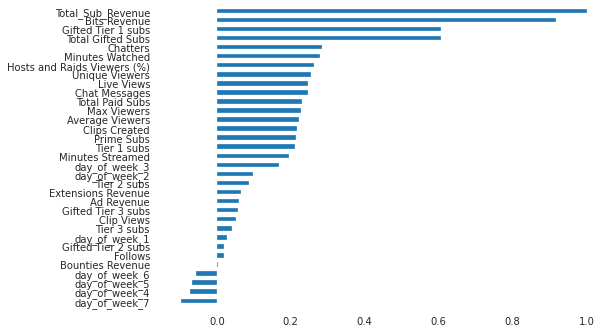

In [ ]:
corr_matrix["Total_Sub_Revenue"].sort_values().plot.barh()

In [ ]:
twitch_ana_subset01_df['Bits Revenue'].sum()

7551.610000000001

In [ ]:
twitch_ana_subset01_df['Total_Sub_Revenue'].sum()

16344.231000000002

In [ ]:
donations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      176 non-null    datetime64[ns]
 1   Donation  176 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


In [ ]:
donations_df.head()

,Date,Donation
0,2020-04-20,100.69
1,2020-04-01,100.00
2,2020-03-27,100.00
3,2020-02-29,10.00
4,2020-02-21,5.00


In [ ]:
test_wrangle_df.new_date.head()

0   2017-06-01
1   2017-06-02
2   2017-06-03
3   2017-06-04
4   2017-06-05
Name: new_date, dtype: datetime64[ns]

### Additional data Request

#### Time permitting I would like to source additional data.  The site:
 **sullygnome.com**
#### collects data from twitch on **which actual games are being stream**.  I would like to **merge** some of this data with **feature engeering**.  

####To that end, I will compose an **email request** for starkells data today.  

In [ ]:
twitch_analy_df.describe()

,Ad Breaks (Minutes),Ad Time (Seconds) Per Hour,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Game Sales Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,Total_Sub_Revenue,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
count,1171.0,1171.0,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.0,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000
mean,0.0,0.0,21.617276,1151.332195,32.520922,9.452605,1.600342,6.058070,5.183723,169.387703,38.640478,4812.817250,168.687447,111.516652,2.173386,0.560363,4.760636,6.448856,0.010808,0.0,0.003450,0.036721,0.224594,0.841161,0.751494,0.086251,0.003416,2.005978,1.997438,0.005978,0.002562,13.957499,0.143467,0.143467,0.142613,0.142613,0.142613,0.142613,0.142613
std,0.0,0.0,30.188681,1197.929623,26.555541,27.733810,2.413806,15.492652,7.412363,184.691959,57.142345,5797.838972,146.385429,122.997020,2.783492,1.304687,14.385364,30.591884,0.042316,0.0,0.084265,1.256580,0.522921,1.010397,0.956617,0.312542,0.058371,6.033876,6.026082,0.077118,0.050572,37.722930,0.350698,0.350698,0.349827,0.349827,0.349827,0.349827,0.349827
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,21.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,23.070000,852.000000,33.000000,4.000000,1.000000,2.000000,2.510000,154.000000,34.000000,4058.000000,178.000000,100.000000,2.035000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.545500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,29.745000,1910.500000,53.000000,11.000000,2.000000,6.000000,7.705000,267.000000,48.000000,7088.500000,285.500000,170.000000,4.497500,0.000000,2.320000,1.520000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,12.127500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,603.940000,7537.000000,141.000000,743.000000,18.000000,358.000000,67.240000,1953.000000,875.000000,66715.000000,1197.000000,1448.000000,16.795000,12.475000,239.390000,576.710000,0.581000,0.0,2.400000,43.000000,5.000000,5.000000,5.000000,2.000000,1.000000,101.000000,101.000000,1.000000,1.000000,588.365000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


mean = 5.18372331340735
median = 2.51
mode = 0.0


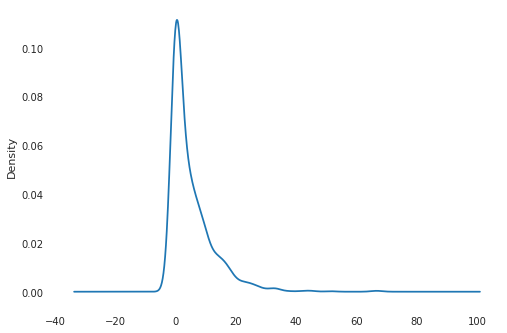

In [ ]:
twitch_analy_df['Hosts and Raids Viewers (%)'].plot.density();


print("mean = " + str(np.mean(twitch_analy_df['Hosts and Raids Viewers (%)'])))
print("median = " + str(np.median(twitch_analy_df['Hosts and Raids Viewers (%)'])))
print("mode = " + str(twitch_analy_df['Hosts and Raids Viewers (%)'].mode().iloc[0]))


In [ ]:
twitch_analy_df['Hosts and Raids Viewers (%)'].value_counts()

0.00     397
0.02       8
0.07       5
0.15       4
0.03       4
        ... 
17.21      1
22.47      1
21.70      1
4.16       1
4.80       1
Name: Hosts and Raids Viewers (%), Length: 622, dtype: int64

In [ ]:
twitch_analy_df['Hosts and Raids Viewers (%)'].describe()

count    1171.000000
mean        5.183723
std         7.412363
min         0.000000
25%         0.000000
50%         2.510000
75%         7.705000
max        67.240000
Name: Hosts and Raids Viewers (%), dtype: float64

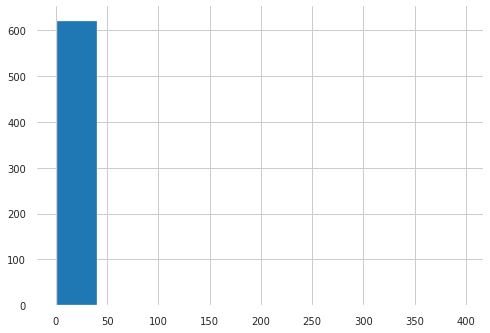

In [ ]:
twitch_analy_df['Hosts and Raids Viewers (%)'].value_counts().hist(bins=10)

In [ ]:
donations_df.shape

(176, 2)

In [ ]:
donation_dates = donations_df.Date.value_counts().index
donation_dates

DatetimeIndex(['2018-05-05', '2018-11-13', '2019-11-16', '2018-04-05',
               '2018-11-15', '2018-12-15', '2017-12-23', '2018-08-18',
               '2019-02-26', '2018-08-17',
               ...
               '2019-01-17', '2018-06-14', '2019-09-05', '2019-11-22',
               '2018-06-01', '2020-04-01', '2018-06-09', '2018-01-17',
               '2018-06-22', '2020-01-23'],
              dtype='datetime64[ns]', length=116, freq=None)

In [ ]:
donations_df.Date.iloc[0]

Timestamp('2020-04-20 00:00:00')

In [ ]:
condition_date = (donations_df["Date"] == '2018-05-05')
donations_df[condition_date]

,Date,Donation
134,2018-05-05,5.0
135,2018-05-05,5.0
136,2018-05-05,5.0
137,2018-05-05,100.0
138,2018-05-05,5.0
139,2018-05-05,5.0
140,2018-05-05,5.0
141,2018-05-05,5.0
142,2018-05-05,5.0
143,2018-05-05,5.0


In [ ]:
donations_df[condition_date].Donation.sum()

145.0

## Create the Streak feature - consecutive days streamed.  

In [ ]:
#create a streak feature.  how many consecutive days streamed
def create_streak_feature(df):

  streak_df = pd.DataFrame({"streak": [0 for x in range(0,df.shape[0])] })
  df["streak"] = streak_df["streak"]

  streak_list = []
  curr_streak = 0
  for x in range(0,df.shape[0]):
 
    if df.iloc[x, 10]> 0:
      curr_streak = curr_streak +1
      streak_list.append(curr_streak)
    
    elif df.iloc[x, 10]== 0:
      curr_streak = 0
      streak_list.append(curr_streak)

  df["streak"] = streak_list
  
  return df
  

In [ ]:
#create new df
# new_donations_df = (pd.DataFrame({"Date" : donation_dates,
#                                  "donations": [0 for x in donation_dates]}))\
#                                  .set_index("Date")
# for x in donation_dates:

#   cond_date = donations_df["Date"] == x
#   new_donations_df.loc[x, "donations" ]= donations_df[cond_date].Donation.sum()
#   print(new_donations_df.loc[x, "donations"])


### This is the mini wrangle for the Donations DataFrame from streamlabs 

#### I am summing up all the donations for a given date. 

In [ ]:
def donation_mini_wrangle(df):
  #create a condition the gets all the dates of donations
  donation_dates = df.Date.value_counts().index

  # create a dataframe that has the dates index, and 0 as donation values
  new_donations_df = (pd.DataFrame({"Date" : donation_dates,
                                 "donations": [0 for x in donation_dates]}))\
                                 .set_index("Date")

  # fill in the values with the sum of donations for that date
  for x in donation_dates:
    cond_date = donations_df["Date"] == x
    new_donations_df.loc[x, "donations" ]= df[cond_date].Donation.sum()
  

  return new_donations_df

### Create a Streamer Activity Feature - how active has the stream been in the last 30 days.  

In [ ]:
from collections import deque

def create_activity_feature(df):

  test_queue = deque()
  activ_list = []


  for x in range(0, df.shape[0]):
    curr_activity = 0

    #check the size of queue
    if len(test_queue) < 30:

      if df.iloc[x,38]> 0:
        test_queue.append(1)

      elif df.iloc[x, 38]<1:
        test_queue.append(0)

    # check, add and pop from full queue    
    elif len(test_queue) >=30:
            
      if df.iloc[x, 38]>0:
        test_queue.append(1)
        test_queue.popleft()

      elif df.iloc[x, 38]<1:
        test_queue.append(0)
        test_queue.popleft()
            
    # sum and divide for this observation
    curr_activity = sum(test_queue)/30

    # add this observation score to the list
    activ_list.append(curr_activity)
  
    
  df["activity"] = activ_list
    

  return df
  # print(len(activ_list))

In [ ]:
# new_donations_df = donation_mini_wrangle(donations_df)

In [ ]:
# new_donations_df.head()

In [ ]:
# new_donations_df["donations"].value_counts()

##** TODO:** 

#### Drop: 
*  'Ad Breaks (Minutes)', 'Ad Time (Seconds) Per Hour', 'Game Sales Revenue'
*  possible drop two rows where minute == 0 & donations > 0 (these are from another stream)
* drop first 12 rows - they are tests of the stream.  

#### parse the Date feature for twitch main df
*   stretch - check current events or game release dates



#### add a total revenue feature 
*   just combine all the revenue features - this is more for explanatory - not for the model. 

### From collapse Donations df 
* get the sum of donation for a single day in one row. 

#### Merge donations df into twitch main by Date


#### Engineer
* add total sub revenue column
* create total revenue column - maybe
* create Day of the week
* create streak column - number of consecutive days streamed.
* chat message per viewer  aka engagement
* chatter per viewer a
* amount of streams in the previous 30 period.  "Activity"



In [ ]:
def wrangle_starkells_data(t_df, s_df):
  #drop the features
  drop_list = ['Ad Breaks (Minutes)', 'Ad Time (Seconds) Per Hour',
               'Game Sales Revenue']
  t_df = t_df.drop(columns=drop_list)

  # separate day of week to new feature
  t_df = create_day_of_week_list(t_df)

  # convert date to datetime type
  t_df = convert_twitch_date(t_df)

  # combine all the revenue features
  t_df["Total_Sub_Revenue"] = (
      t_df["Sub Revenue"] + t_df['Prime Revenue'] \
      + t_df['Gifted Subs Revenue'] + t_df['Bits Revenue'] + \
      t_df['Ad Revenue'] + t_df['Extensions Revenue']
      )
  
  #rename the date
  t_df = t_df.drop(columns="Date", axis=1)
  t_df["Date"] = t_df["new_date"]
  t_df = t_df.drop(columns="new_date", axis=1)


  #bring in the streamlabs dataframe and prepare it for merge 
  s_df = donation_mini_wrangle(s_df)

  #merge the two dataframe
  merge_df = t_df.merge(s_df, how="outer", left_on="Date", right_on="Date")

  #replace the null donations with 0
  merge_df = merge_df.fillna(0)

  #create Total Earnings feature
  merge_df["Total_Earnings"] = merge_df["Total_Sub_Revenue"] + merge_df["donations"]

  #create Streak Feature
  merge_df = create_streak_feature(merge_df)

  # set the index to the date 
  merge_df = merge_df.set_index("Date")

  # slice off the first 12 rows of the stream
  merge_df = merge_df.iloc[12:,:]

  # create Activity Feature
  merge_df = create_activity_feature(merge_df)

  # create messages per unique viewer
  merge_df["avg_message_per_viewer"] = merge_df["Chat Messages"]/merge_df['Unique Viewers']

  # create chatter per unique viewer
  merge_df["user_chatting_percent"] = (merge_df['Chatters']/merge_df['Unique Viewers'])*100

  return merge_df


In [ ]:
donation_orginal.shape

(176, 2)

In [ ]:
print(twitch_orginal.shape)
twitch_orginal.tail(5)

(1171, 32)


,Date,Ad Breaks (Minutes),Ad Time (Seconds) Per Hour,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Game Sales Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs
1166,Mon Aug 10 2020,0,0,0.00,15,1,0,0,0,0.00,0,0,0,0,0,2.455,0.0,0.00,0.0,0.0000,0,0.0,0,0,1,1,0,0,0,0,0,0
1167,Tue Aug 11 2020,0,0,0.00,16,1,0,0,0,0.00,0,0,0,0,0,0.000,0.0,0.00,0.0,0.0000,0,0.0,0,0,0,0,0,0,0,0,0,0
1168,Wed Aug 12 2020,0,0,25.05,640,39,0,2,3,0.00,128,35,3708,148,98,2.320,0.0,0.00,0.0,0.0805,0,0.0,0,0,1,1,0,0,0,0,0,0
1169,Thu Aug 13 2020,0,0,25.72,1282,46,0,0,6,8.11,188,57,6199,241,143,0.000,0.0,4.65,1.0,0.0105,0,0.0,0,0,0,0,0,0,2,2,0,0
1170,Fri Aug 14 2020,0,0,21.21,47,12,4,1,1,16.00,9,24,700,33,9,2.460,0.0,0.00,1.0,0.0000,0,0.0,0,0,1,1,0,0,0,0,0,0


In [ ]:
twitch_wrangled_df = wrangle_starkells_data(twitch_orginal, donation_orginal)
print(twitch_wrangled_df.shape)
twitch_wrangled_df.head(2)

(1159, 42)


,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,activity,avg_message_per_viewer,user_chatting_percent
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-06-13,2.98,114,6,0,0,1,0.0,11,5,480,157,9,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1,0.033333,12.666667,66.666667
2017-06-14,3.47,260,9,0,0,2,0.0,35,8,653,192,26,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,2,0.066667,10.000000,34.615385


In [ ]:
twitch_wrangled_df.isnull().sum()

Average Viewers                  0
Chat Messages                    0
Chatters                         0
Clip Views                       0
Clips Created                    0
Follows                          0
Hosts and Raids Viewers (%)      0
Live Views                       0
Max Viewers                      0
Minutes Watched                  0
Minutes Streamed                 0
Unique Viewers                   0
Sub Revenue                      0
Prime Revenue                    0
Gifted Subs Revenue              0
Bits Revenue                     0
Ad Revenue                       0
Extensions Revenue               0
Bounties Revenue                 0
Prime Subs                       0
Total Paid Subs                  0
Tier 1 subs                      0
Tier 2 subs                      0
Tier 3 subs                      0
Total Gifted Subs                0
Gifted Tier 1 subs               0
Gifted Tier 2 subs               0
Gifted Tier 3 subs               0
day_of_week_1       

#  **this is the point at which to export the csv of clean data!!!**

In [ ]:
twitch_wrangled_df.to_csv("twitch_clean_data.csv", na_rep='Unknown')

In [ ]:
twitch_wrangled_df.columns

Index(['Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'Sub Revenue', 'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue',
       'Ad Revenue', 'Extensions Revenue', 'Bounties Revenue', 'Prime Subs',
       'Total Paid Subs', 'Tier 1 subs', 'Tier 2 subs', 'Tier 3 subs',
       'Total Gifted Subs', 'Gifted Tier 1 subs', 'Gifted Tier 2 subs',
       'Gifted Tier 3 subs', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
       'Total_Sub_Revenue', 'donations', 'Total_Earnings', 'streak',
       'avg_message_per_viewer'],
      dtype='object')

In [ ]:
twitch_wrangled_df["chat_message_per_viewer"] = twitch_wrangled_df["Chat Messages"]/twitch_wrangled_df['Unique Viewers']
twitch_wrangled_df["chat_message_per_viewer"].shape

(1159,)

In [ ]:
twitch_wrangled_df["user_chatting_percent"] = (twitch_wrangled_df['Chatters']/twitch_wrangled_df['Unique Viewers'])*100
twitch_wrangled_df["user_chatting_percent"].shape

(1159,)

In [ ]:
cond_inf = (twitch_wrangled_df["chat_message_per_viewer"].isnull() == True) & (twitch_wrangled_df["Bits Revenue"] >0)
cond_inf

Date
2017-06-13    False
2017-06-14    False
2017-06-15    False
2017-06-16    False
2017-06-17    False
              ...  
2020-08-10    False
2020-08-11    False
2020-08-12    False
2020-08-13    False
2020-08-14    False
Length: 1159, dtype: bool

## these are mistakes or outliers and should be delete per Streamer(Domain Research)

In [ ]:
twitch_wrangled_df[cond_inf]


,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,avg_message_per_viewer,chat_message_per_viewer,user_chatting_percent
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-31,0.0,0,0,5,0,5,0.0,0,0,0,0,0,2.32,4.99,0.00,9.93,0.0,0.0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,17.24,0.0,17.24,0,NaN,NaN,NaN
2019-10-06,0.0,0,0,1,0,0,0.0,0,0,0,0,0,9.24,0.00,4.66,18.50,0.0,0.0,0,0,4,4,0,0,2,2,0,0,0,0,0,1,0,0,0,32.40,0.0,32.40,0,NaN,NaN,NaN


In [ ]:
# twitch_wrangled_df.iloc[12:,:].head()

In [ ]:
twitch_wrangled_df.describe()

,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,avg_message_per_viewer,chat_message_per_viewer,user_chatting_percent
count,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.00000,1159.000000,1159.000000,1159.00000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1056.000000,1056.000000,1056.000000
mean,21.841096,1163.233822,32.854185,9.550475,1.616911,6.120794,5.237394,171.141501,39.040552,4862.647972,170.433995,112.671268,2.195889,0.566165,4.809927,6.515626,0.01092,0.003486,0.037101,0.22692,0.849871,0.759275,0.087144,0.003451,2.026747,2.018119,0.006040,0.002588,0.143227,0.143227,0.142364,0.142364,0.142364,0.143227,0.143227,14.102011,5.495470,19.597481,13.141501,inf,inf,inf
std,30.263970,1198.362025,26.488704,27.860354,2.420749,15.560376,7.431766,184.835591,57.301411,5806.957857,146.126057,123.104964,2.789024,1.310175,14.451500,30.742902,0.04252,0.084700,1.263068,0.52512,1.011965,0.958481,0.314033,0.058671,6.061585,6.053776,0.077514,0.050833,0.350455,0.350455,0.349574,0.349574,0.349574,0.350455,0.350455,37.890977,31.844368,54.431782,20.419664,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.127750,0.000000,7.445754,7.445754,28.183193
50%,23.330000,864.000000,33.000000,4.000000,1.000000,2.000000,2.560000,157.000000,34.000000,4151.000000,183.000000,102.000000,2.100000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.660000,0.000000,4.590000,3.000000,11.586881,11.586881,35.000000
75%,29.770000,1928.500000,53.500000,11.000000,3.000000,6.000000,7.745000,268.500000,48.000000,7094.500000,287.000000,171.000000,4.515000,0.000000,2.320000,1.565000,0.00000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.171000,0.000000,14.645000,17.500000,18.391403,18.391403,54.363811
max,603.940000,7537.000000,141.000000,743.000000,18.000000,358.000000,67.240000,1953.000000,875.000000,66715.000000,1197.000000,1448.000000,16.795000,12.475000,239.390000,576.710000,0.58100,2.400000,43.000000,5.00000,5.000000,5.000000,2.000000,1.000000,101.000000,101.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,588.365000,488.700000,672.210000,91.000000,inf,inf,inf


### Create a function that tracks how many days of the last 30 that you streamed


In [ ]:
# create a queue that can hold a max of 30 values
# if the length is less than 30 
# and streamer minutes is greater than 0 for that day
# add a 1 or 0 to the queue
# return the sum of the queue divided by 30 as an activity score.  
# if the length is 30 or more, pop the first number out, then add 1 or 0 to the queue
# depending on whether the streamer minutes is greater than 0 for that day
# return the sum divided by 30 as an activity score.  

In [ ]:
# streak_list = []
#   curr_streak = 0
#   for x in range(0,1171):
 
#     if df.iloc[x, 10]> 0:
#       curr_streak = curr_streak +1
#       streak_list.append(curr_streak)
    
#     elif df.iloc[x, 10]== 0:
#       curr_streak = 0
#       streak_list.append(curr_streak)

#   df["streak"] = streak_list

In [ ]:
twitch_wrangled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1159 entries, 2017-06-13 to 2020-08-14
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Average Viewers              1159 non-null   float64
 1   Chat Messages                1159 non-null   int64  
 2   Chatters                     1159 non-null   int64  
 3   Clip Views                   1159 non-null   int64  
 4   Clips Created                1159 non-null   int64  
 5   Follows                      1159 non-null   int64  
 6   Hosts and Raids Viewers (%)  1159 non-null   float64
 7   Live Views                   1159 non-null   int64  
 8   Max Viewers                  1159 non-null   int64  
 9   Minutes Watched              1159 non-null   int64  
 10  Minutes Streamed             1159 non-null   int64  
 11  Unique Viewers               1159 non-null   int64  
 12  Sub Revenue                  1159 non-null   float64
 13  

In [ ]:
twitch_wrangled_df.tail(2)

,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,avg_message_per_viewer,user_chatting_percent
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-13,25.72,1282,46,0,0,6,8.11,188,57,6199,241,143,0.00,0.0,4.65,1.0,0.0105,0.0,0,0,0,0,0,0,2,2,0,0,1,0,0,0,0,0,0,5.6605,0.0,5.6605,2,8.965035,32.167832
2020-08-14,21.21,47,12,4,1,1,16.00,9,24,700,33,9,2.46,0.0,0.00,1.0,0.0000,0.0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3.4600,0.0,3.4600,3,5.222222,133.333333


In [ ]:
twitch_wrangled_df.shape[0]

1159

In [ ]:
yataaaa= create_activity_feature(twitch_wrangled_df)
yataaaa.tail(2)

,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,avg_message_per_viewer,user_chatting_percent,activity
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-13,25.72,1282,46,0,0,6,8.11,188,57,6199,241,143,0.00,0.0,4.65,1.0,0.0105,0.0,0,0,0,0,0,0,2,2,0,0,1,0,0,0,0,0,0,5.6605,0.0,5.6605,2,8.965035,32.167832,0.533333
2020-08-14,21.21,47,12,4,1,1,16.00,9,24,700,33,9,2.46,0.0,0.00,1.0,0.0000,0.0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3.4600,0.0,3.4600,3,5.222222,133.333333,0.533333


In [ ]:
# append to add to the right(back); popleft() to remove from the left(front)

# test_queue = deque()
# activ_list = []


# for x in range(0, 1171):
#   curr_activity = 0

#   #check the size of queue
#   if len(test_queue) < 30:

#     if df.iloc[x,38]> 0:
#       test_queue.append(1)

#     elif df.iloc[x, 38]<1:
#       test_queue.append(0)

#   # check, add and pop from full queue    
#   elif len(test_queue >=30:
           
#     if df.iloc[x, 38]>0:
#       test_queue.append(1)
#       test_queue.popleft()

#     elif df.iloc[x, 38]<1:
#       test_queue.append(0)
#       test_queue.popleft()
           
#   # sum and divide for this observation
#   curr_activity = test_queue.sum()/30

#   # add this observation score to the list
#   activ_list.append(curr_activity)
    
#   df["activity"] = activ_list

In [ ]:
# twitch_wrangled_df["Total_Earnings"] = twitch_wrangled_df["Total_Sub_Revenue"] + \
# twitch_wrangled_df["donations"]

In [ ]:
twitch_wrangled_df.tail()

,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak,avg_message_per_viewer,chat_message_per_viewer,user_chatting_percent
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-10,0.00,15,1,0,0,0,0.00,0,0,0,0,0,2.455,0.0,0.00,0.0,0.0000,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2.4550,0.0,2.4550,0,inf,inf,inf
2020-08-11,0.00,16,1,0,0,0,0.00,0,0,0,0,0,0.000,0.0,0.00,0.0,0.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0000,0.0,0.0000,0,inf,inf,inf
2020-08-12,25.05,640,39,0,2,3,0.00,128,35,3708,148,98,2.320,0.0,0.00,0.0,0.0805,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2.4005,0.0,2.4005,1,6.530612,6.530612,39.795918
2020-08-13,25.72,1282,46,0,0,6,8.11,188,57,6199,241,143,0.000,0.0,4.65,1.0,0.0105,0.0,0,0,0,0,0,0,2,2,0,0,1,0,0,0,0,0,0,5.6605,0.0,5.6605,2,8.965035,8.965035,32.167832
2020-08-14,21.21,47,12,4,1,1,16.00,9,24,700,33,9,2.460,0.0,0.00,1.0,0.0000,0.0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3.4600,0.0,3.4600,3,5.222222,5.222222,133.333333


In [ ]:
twitch_wrangled_df["Total_Earnings"].sum()

22713.481

In [ ]:
twitch_wrangled_df.isnull().sum()

Average Viewers                  0
Chat Messages                    0
Chatters                         0
Clip Views                       0
Clips Created                    0
Follows                          0
Hosts and Raids Viewers (%)      0
Live Views                       0
Max Viewers                      0
Minutes Watched                  0
Minutes Streamed                 0
Unique Viewers                   0
Sub Revenue                      0
Prime Revenue                    0
Gifted Subs Revenue              0
Bits Revenue                     0
Ad Revenue                       0
Extensions Revenue               0
Bounties Revenue                 0
Prime Subs                       0
Total Paid Subs                  0
Tier 1 subs                      0
Tier 2 subs                      0
Tier 3 subs                      0
Total Gifted Subs                0
Gifted Tier 1 subs               0
Gifted Tier 2 subs               0
Gifted Tier 3 subs               0
day_of_week_1       

In [ ]:
twitch_wrangled_df["Chat Messages"].describe()

count    1159.000000
mean     1163.233822
std      1198.362025
min         0.000000
25%        23.000000
50%       864.000000
75%      1928.500000
max      7537.000000
Name: Chat Messages, dtype: float64

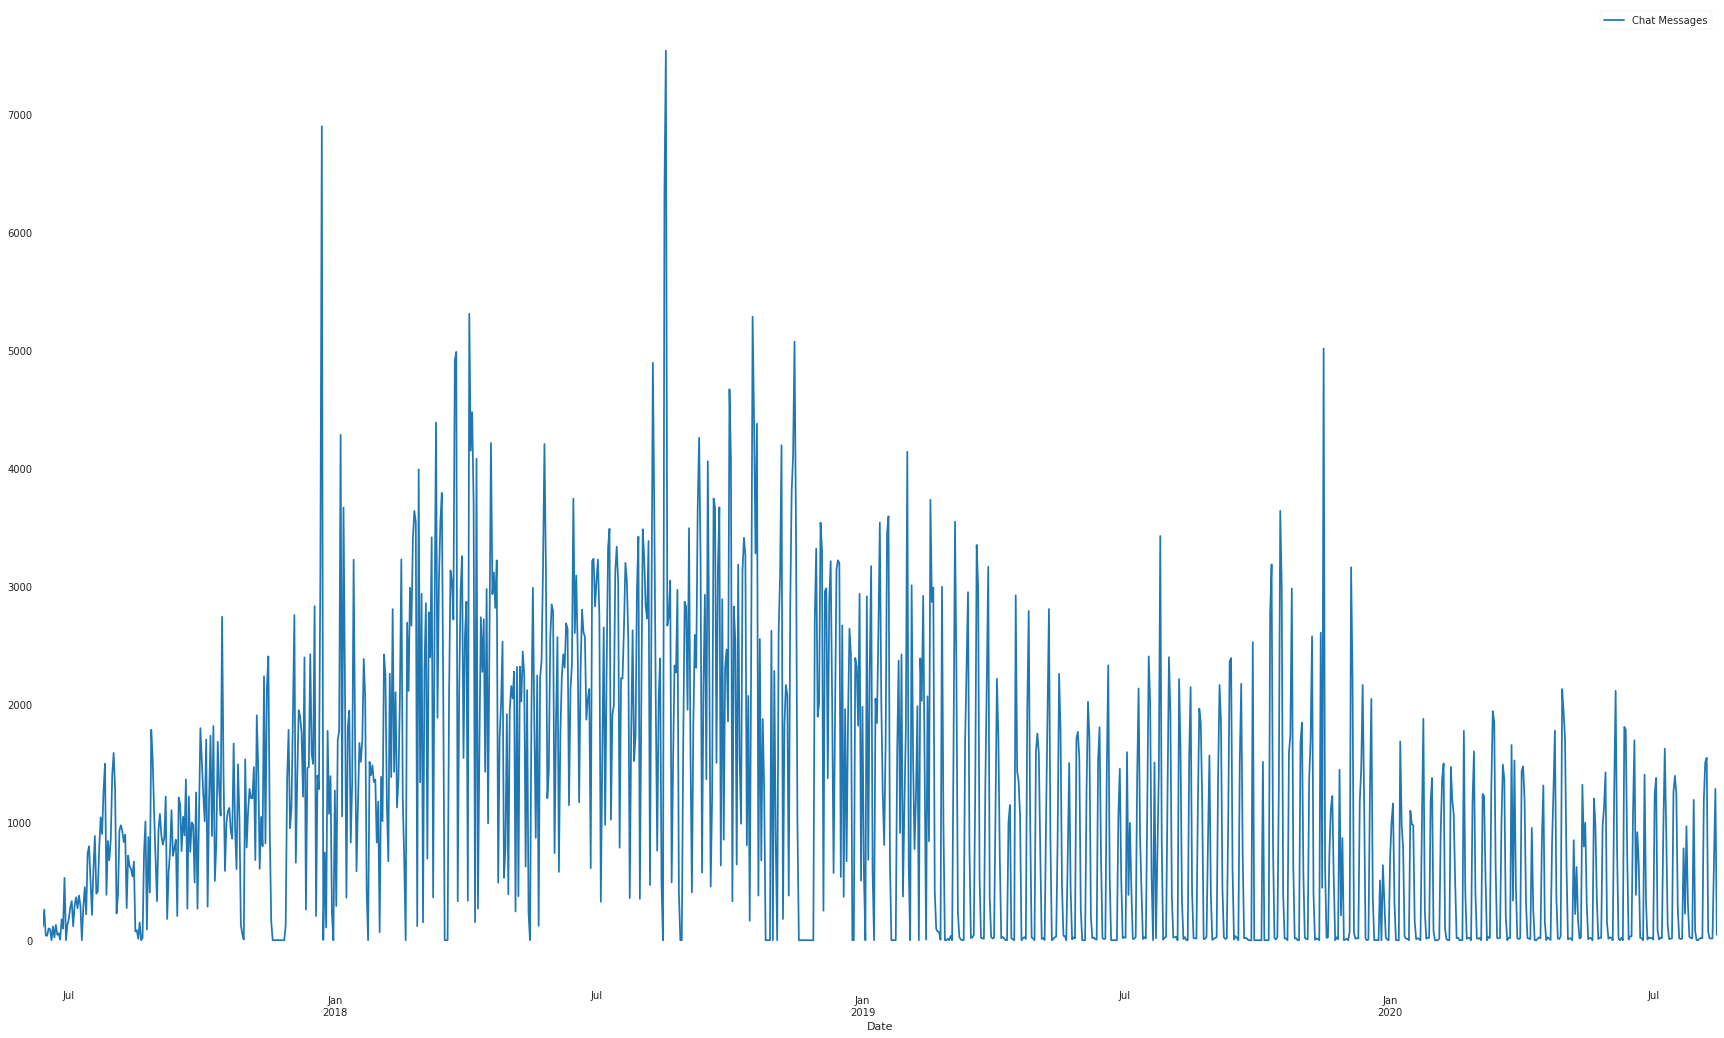

In [ ]:
# df3.plot(x='A', y='B')
# fig, ax = plt.subplots(figsize = (8,8))
twitch_wrangled_df.plot( y="Chat Messages", figsize =(30,18))

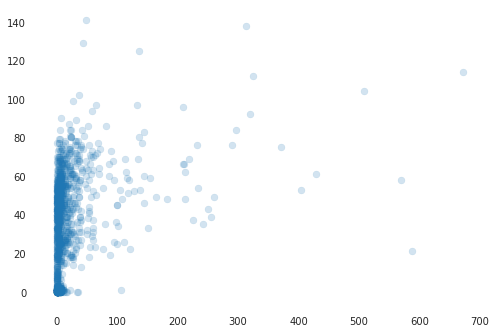

In [ ]:
plt.scatter(twitch_wrangled_df["Total_Earnings"],
            twitch_wrangled_df["Chatters"], alpha=.2)
plt.show()

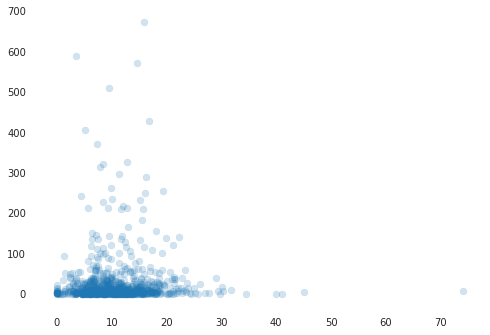

In [ ]:
plt.scatter(twitch_wrangled_df['avg_message_per_viewer'],
            twitch_wrangled_df["Total_Earnings"],
             alpha=.2)
plt.show()

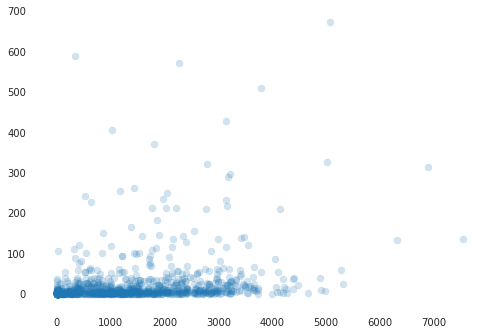

In [ ]:
plt.scatter(twitch_wrangled_df['Chat Messages'],
            twitch_wrangled_df["Total_Earnings"],
             alpha=.2)

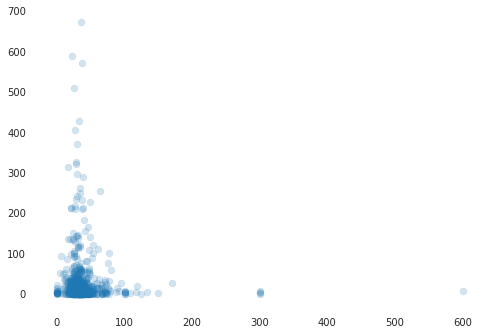

In [ ]:
plt.scatter(twitch_wrangled_df['user_chatting_percent'],
            twitch_wrangled_df["Total_Earnings"],
             alpha=.2)

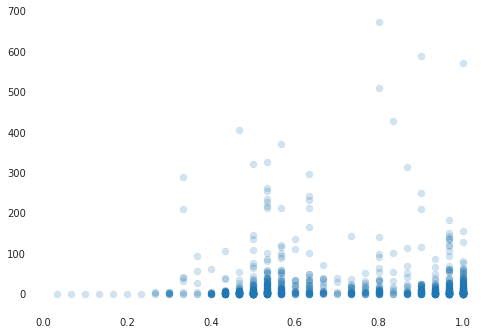

In [ ]:
plt.scatter(twitch_wrangled_df['activity'],
            twitch_wrangled_df["Total_Earnings"],
             alpha=.2)

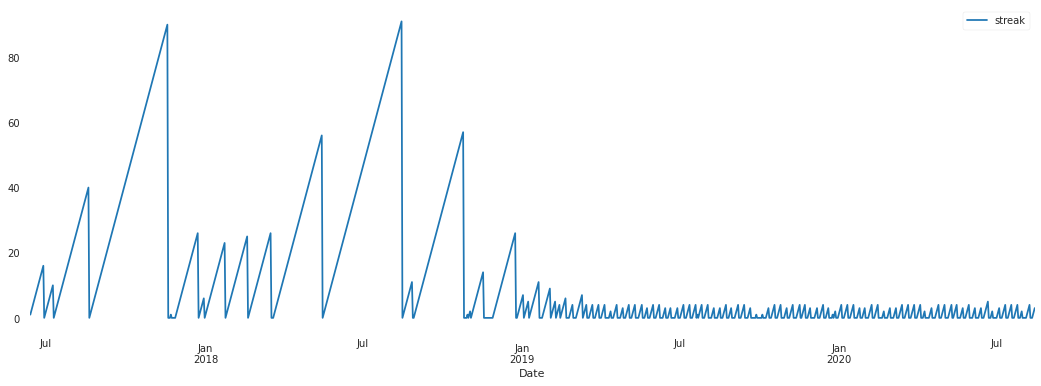

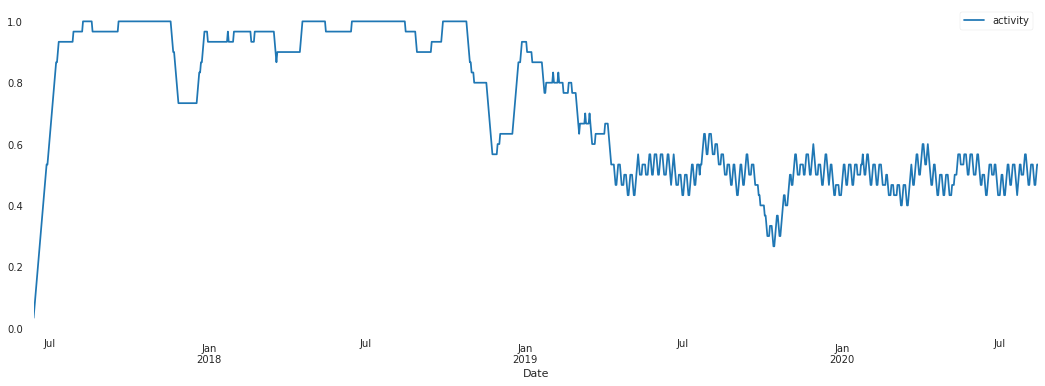

In [ ]:
twitch_wrangled_df.plot( y="streak", figsize =(18,6))
twitch_wrangled_df.plot( y="activity", figsize =(18,6))

In [ ]:
# twitch_wrangled_df.plot( y="activity", figsize =(18,6))

In [ ]:
twitch_wrangled_df.columns

Index(['Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'Sub Revenue', 'Prime Revenue', 'Gifted Subs Revenue', 'Bits Revenue',
       'Ad Revenue', 'Extensions Revenue', 'Bounties Revenue', 'Prime Subs',
       'Total Paid Subs', 'Tier 1 subs', 'Tier 2 subs', 'Tier 3 subs',
       'Total Gifted Subs', 'Gifted Tier 1 subs', 'Gifted Tier 2 subs',
       'Gifted Tier 3 subs', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
       'Total_Sub_Revenue', 'donations', 'Total_Earnings', 'streak',
       'activity', 'avg_message_per_viewer', 'user_chatting_percent'],
      dtype='object')

In [ ]:
short_list = ['Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
         'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
        'Total_Earnings', 'streak', 'avg_message_per_viewer',
        'activity', 'user_chatting_percent']

In [ ]:
twitch_ana_subset01_df = twitch_wrangled_df[short_list]
twitch_ana_subset01_df.shape

(1159, 24)

In [ ]:
twitch_ana_subset01_df.columns

Index(['Average Viewers', 'Chat Messages', 'Chatters', 'Clip Views',
       'Clips Created', 'Follows', 'Hosts and Raids Viewers (%)', 'Live Views',
       'Max Viewers', 'Minutes Watched', 'Minutes Streamed', 'Unique Viewers',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7', 'Total_Earnings',
       'streak', 'avg_message_per_viewer', 'activity',
       'user_chatting_percent'],
      dtype='object')

In [ ]:
corr_matrix = twitch_ana_subset01_df.corr()

In [ ]:
corr_matrix["Total_Earnings"].sort_values(ascending=False)

Total_Earnings                 1.000000
Chatters                       0.333766
Minutes Watched                0.302106
Chat Messages                  0.298061
Unique Viewers                 0.280546
Live Views                     0.278025
Clips Created                  0.261347
Hosts and Raids Viewers (%)    0.237196
Minutes Streamed               0.232080
Max Viewers                    0.215254
Average Viewers                0.197042
day_of_week_3                  0.107523
day_of_week_2                  0.090846
day_of_week_1                  0.055382
Clip Views                     0.045234
Follows                        0.034080
avg_message_per_viewer         0.027515
streak                         0.012905
activity                       0.010665
day_of_week_6                 -0.042051
user_chatting_percent         -0.043589
day_of_week_7                 -0.062687
day_of_week_5                 -0.068802
day_of_week_4                 -0.080316
Name: Total_Earnings, dtype: float64

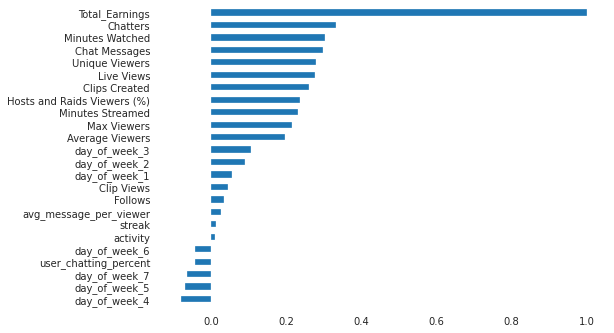

In [ ]:
corr_matrix["Total_Earnings"].sort_values().plot.barh()

## Initial BASELINE METRICS!!!

Need:
MAE
MSE
RMSE

In [ ]:
# what is the baseline Earnings?
twitch_wrangled_df["Total_Earnings"].mean()

19.39665328778817

In [ ]:
guess_earning = twitch_wrangled_df["Total_Earnings"].mean()
guess_earning

19.39665328778817

In [ ]:
errors = guess_earning - twitch_wrangled_df["Total_Earnings"]
errors.tail()

Date
2020-08-10    16.941653
2020-08-11    19.396653
2020-08-12    16.996153
2020-08-13    13.736153
2020-08-14    15.936653
Name: Total_Earnings, dtype: float64

In [ ]:
# Get the MAE
mean_absolute_error = errors.abs().mean()
mean_absolute_error

24.372127146869186

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

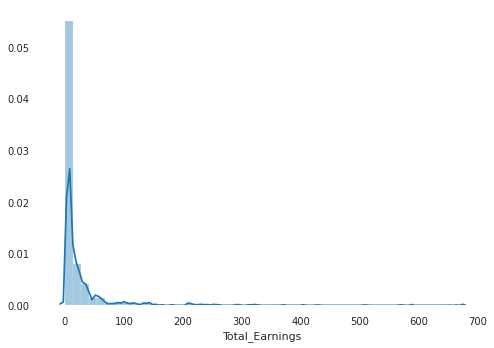

In [ ]:
sns.distplot(twitch_wrangled_df["Total_Earnings"]);

In [ ]:
cond_weird = (twitch_wrangled_df["donations"]>0) & (twitch_wrangled_df["Minutes Streamed"] == 0)
cond_weird

Date
2017-06-01    False
2017-06-02    False
2017-06-03    False
2017-06-04    False
2017-06-05    False
              ...  
2020-08-10    False
2020-08-11    False
2020-08-12    False
2020-08-13    False
2020-08-14    False
Length: 1171, dtype: bool

In [ ]:
# get rid of these two days 
weird_df = twitch_wrangled_df[cond_weird]
weird_df

,Average Viewers,Chat Messages,Chatters,Clip Views,Clips Created,Follows,Hosts and Raids Viewers (%),Live Views,Max Viewers,Minutes Watched,Minutes Streamed,Unique Viewers,Sub Revenue,Prime Revenue,Gifted Subs Revenue,Bits Revenue,Ad Revenue,Extensions Revenue,Bounties Revenue,Prime Subs,Total Paid Subs,Tier 1 subs,Tier 2 subs,Tier 3 subs,Total Gifted Subs,Gifted Tier 1 subs,Gifted Tier 2 subs,Gifted Tier 3 subs,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,Total_Sub_Revenue,donations,Total_Earnings,streak
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-13,0.0,0,0,1,0,1,0.0,2,0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.28,1.28,0
2020-04-20,0.0,14,1,0,0,0,0.0,0,0,0,0,0,4.7,0.0,0.0,0.0,0.0,0.0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,4.7,100.69,105.39,0
